<Figure size 1200x600 with 0 Axes>

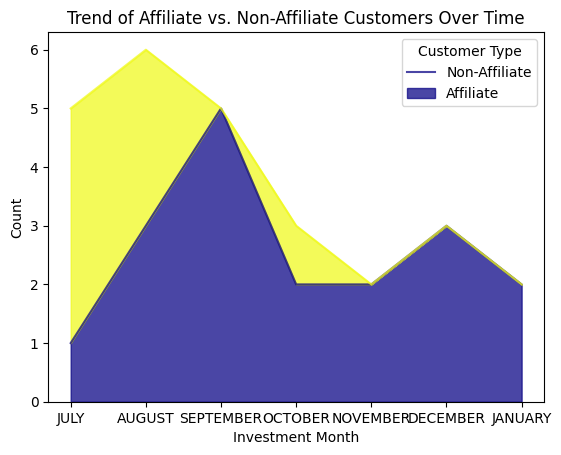

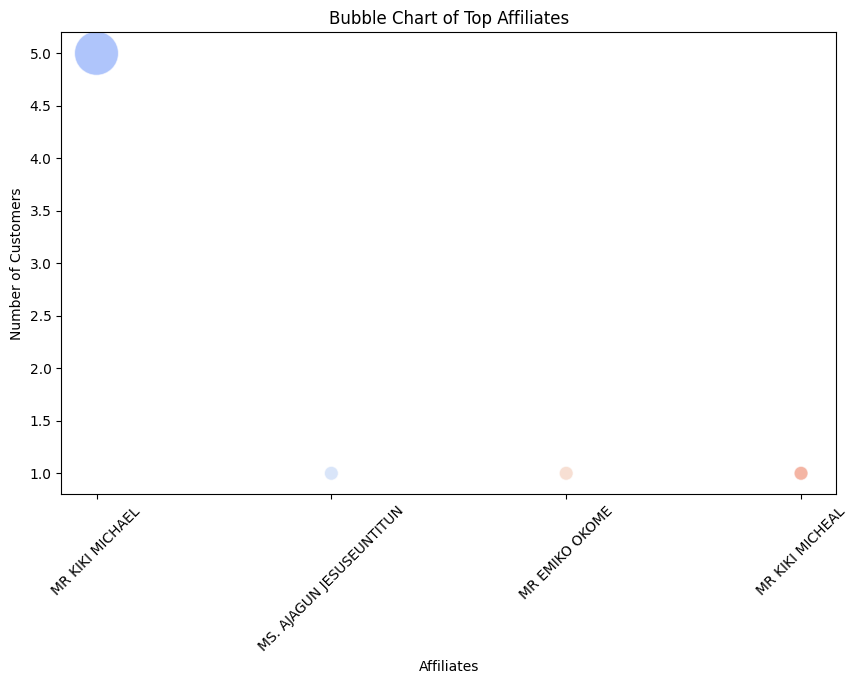

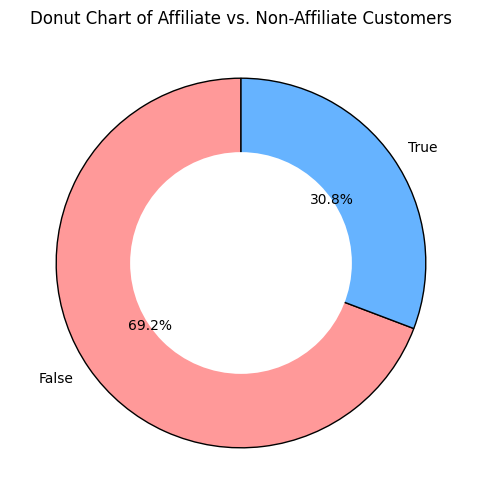

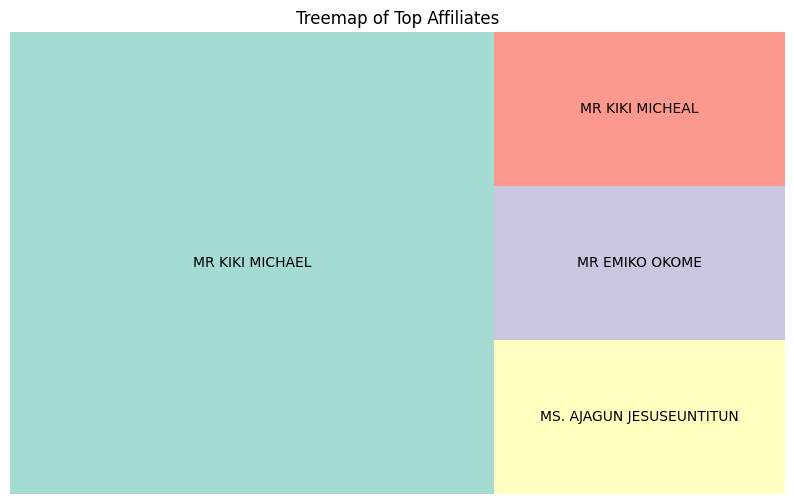

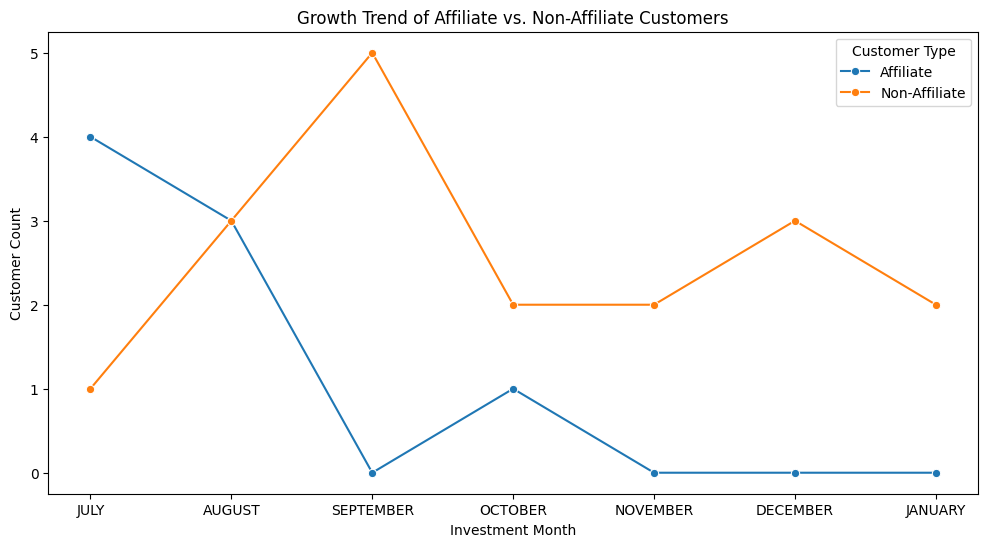

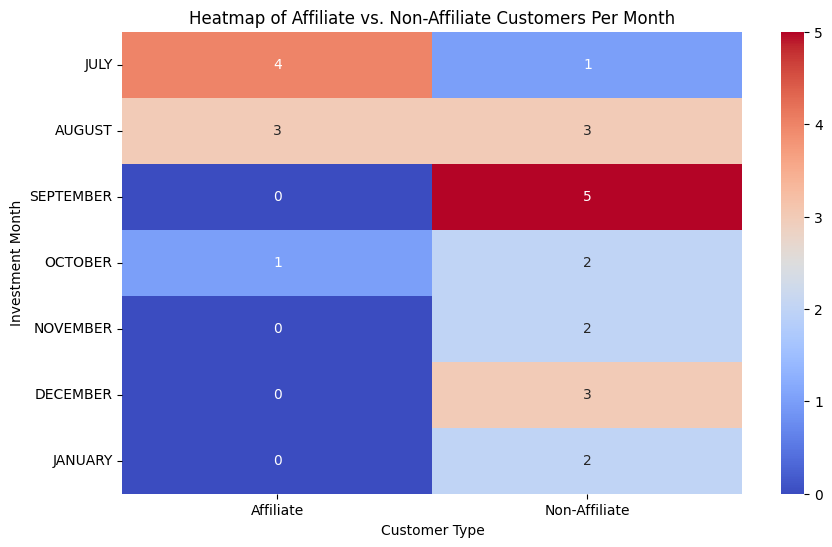

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
import squarify
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter

# Load the Excel file
file_path = "ROYAL PALM RECEIPT & PORTFOLIO (3).xlsx"
xls = pd.ExcelFile(file_path)

# Load the "PORTFOLIO" sheet
df = pd.read_excel(xls, sheet_name="PORTFOLIO")

# Select relevant columns
df = df[["S/N", "NAME", "INVESTMENT YEAR", "INVESTMENT MONTH", "AFFILIATE", "AFFILIATE 10%"]]

# Convert investment year to integer and filter relevant data
df = df.dropna(subset=["INVESTMENT YEAR", "INVESTMENT MONTH"])
df["INVESTMENT YEAR"] = df["INVESTMENT YEAR"].astype(int)
df = df[(df["INVESTMENT YEAR"] == 2024) | ((df["INVESTMENT YEAR"] == 2025) & (df["INVESTMENT MONTH"] == "JANUARY"))]

# Remove last two refunded/incomplete customers
df = df.iloc[:-2]

# Mark customers that came through affiliates (NIL means non-affiliate)
df["Came_Through_Affiliate"] = df["AFFILIATE"].apply(lambda x: x != "NIL")

# Define correct month order
month_order = ["JULY", "AUGUST", "SEPTEMBER", "OCTOBER", "NOVEMBER", "DECEMBER", "JANUARY"]
df["INVESTMENT MONTH"] = pd.Categorical(df["INVESTMENT MONTH"], categories=month_order, ordered=True)

# Cross-tabulation of affiliates by month
affiliate_by_month = pd.crosstab(df["INVESTMENT MONTH"], df["Came_Through_Affiliate"])

# Top affiliates by customer count
top_affiliates = df[df["AFFILIATE"] != "NIL"]["AFFILIATE"].value_counts().head(10)

# Visualization: Stacked Area Chart
plt.figure(figsize=(12, 6))
affiliate_by_month.plot.area(colormap="plasma", alpha=0.75)
plt.title("Trend of Affiliate vs. Non-Affiliate Customers Over Time")
plt.xlabel("Investment Month")
plt.ylabel("Count")
plt.legend(["Non-Affiliate", "Affiliate"], title="Customer Type")
plt.show()

# Visualization: Bubble Chart
plt.figure(figsize=(10, 6))
sns.scatterplot(x=top_affiliates.index, y=top_affiliates.values, size=top_affiliates.values, sizes=(100, 1000), alpha=0.6, palette="coolwarm", hue=top_affiliates.index, legend=False)
plt.xticks(rotation=45)
plt.title("Bubble Chart of Top Affiliates")
plt.xlabel("Affiliates")
plt.ylabel("Number of Customers")
plt.show()

# Visualization: Donut Chart
plt.figure(figsize=(6, 6))
colors = ["#ff9999", "#66b3ff"]
df["Came_Through_Affiliate"].value_counts().plot.pie(autopct="%1.1f%%", colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.gca().add_artist(plt.Circle((0, 0), 0.6, fc='white'))
plt.title("Donut Chart of Affiliate vs. Non-Affiliate Customers")
plt.ylabel("")
plt.show()

# Visualization: Treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=top_affiliates.values, label=top_affiliates.index, alpha=0.8, color=plt.cm.Set3.colors)
plt.axis("off")
plt.title("Treemap of Top Affiliates")
plt.show()

# Visualization: Line Chart with Trend Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x=affiliate_by_month.index, y=affiliate_by_month[True], label="Affiliate", marker="o")
sns.lineplot(x=affiliate_by_month.index, y=affiliate_by_month[False], label="Non-Affiliate", marker="o")
plt.title("Growth Trend of Affiliate vs. Non-Affiliate Customers")
plt.xlabel("Investment Month")
plt.ylabel("Customer Count")
plt.legend(title="Customer Type")
plt.show()

# Visualization: Heatmap
affiliate_heatmap = pd.crosstab(df["INVESTMENT MONTH"], df["Came_Through_Affiliate"].replace({True: "Affiliate", False: "Non-Affiliate"}))
plt.figure(figsize=(10, 6))
sns.heatmap(affiliate_heatmap, cmap="coolwarm", annot=True, fmt="d")
plt.title("Heatmap of Affiliate vs. Non-Affiliate Customers Per Month")
plt.xlabel("Customer Type")
plt.ylabel("Investment Month")
plt.show()

# Visualization: 3D Bar Chart
fig = px.bar(df, x="INVESTMENT MONTH", y=df["Came_Through_Affiliate"].astype(int), color="Came_Through_Affiliate", barmode="group", height=500, title="3D Bar Chart of Affiliate vs. Non-Affiliate Customers", labels={"Came_Through_Affiliate": "Affiliate Status"})
fig.show()


# Save cleaned data with affiliation status
df.to_excel("Cleaned_Affiliate_Report.xlsx", index=False)
